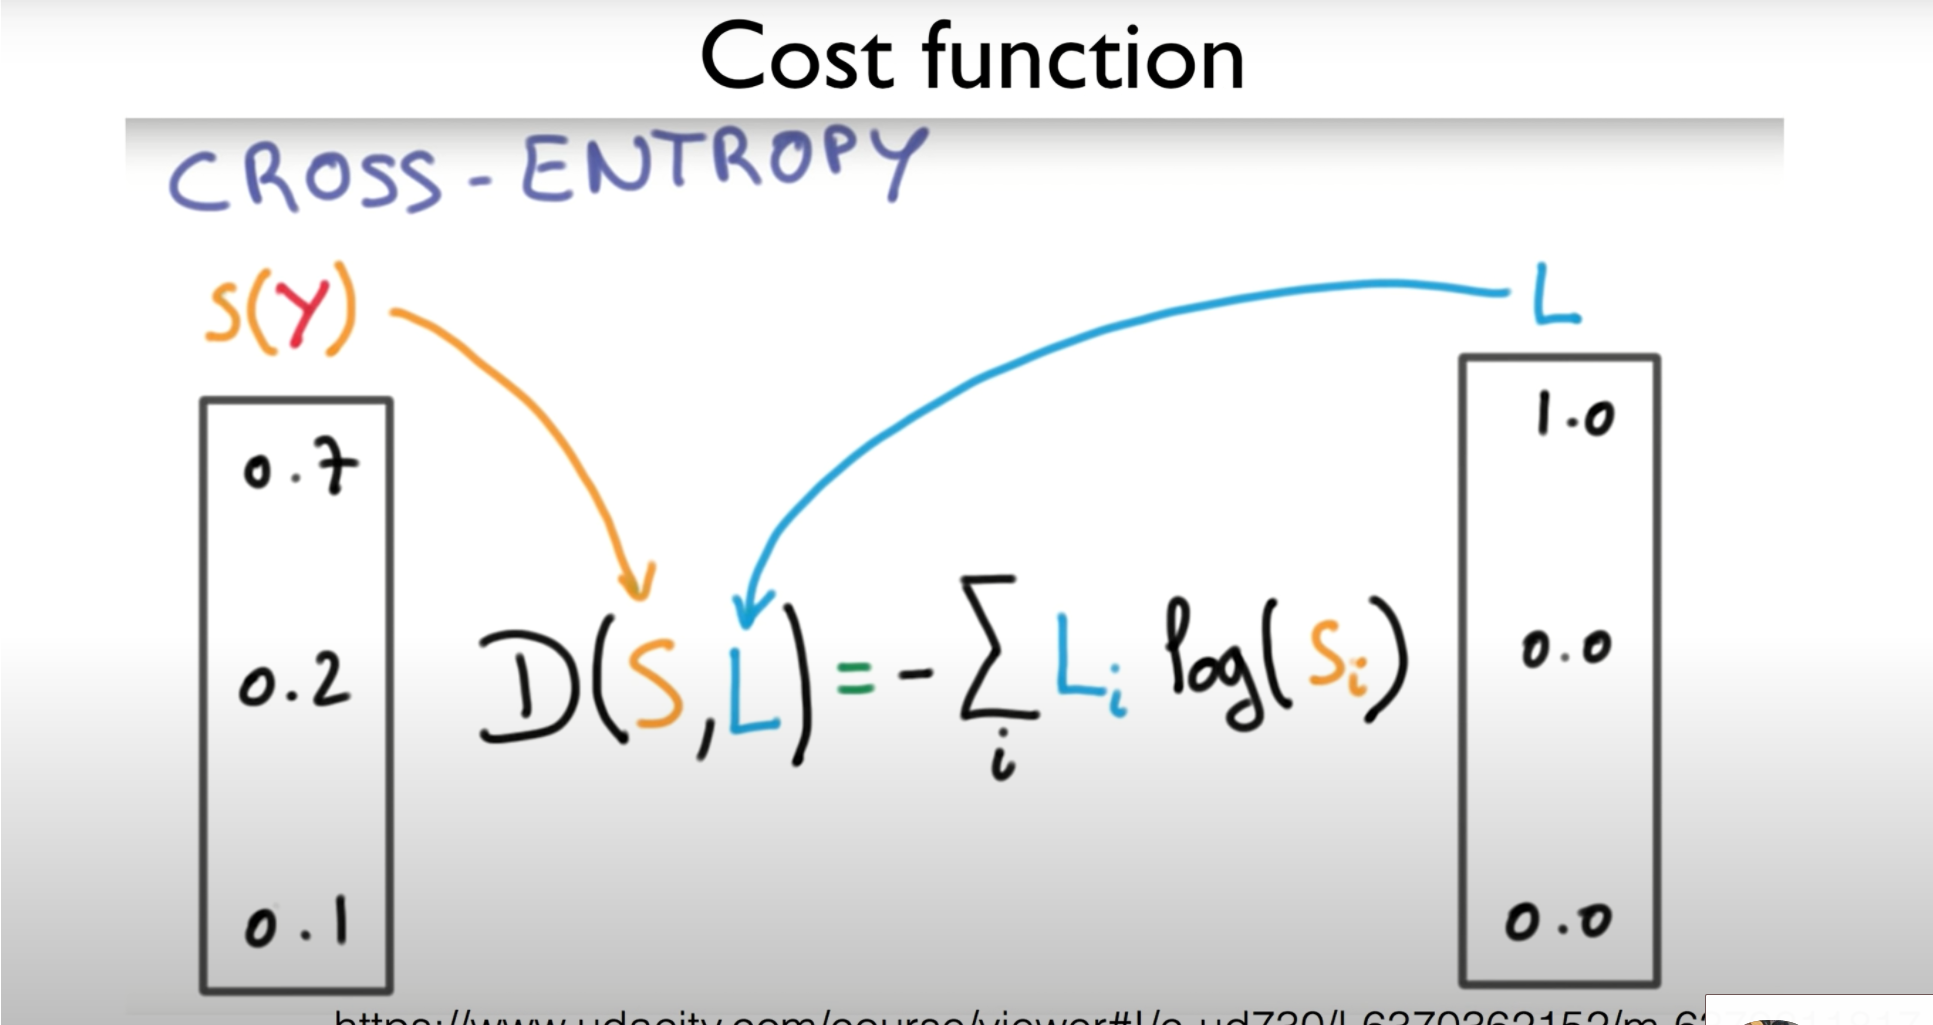

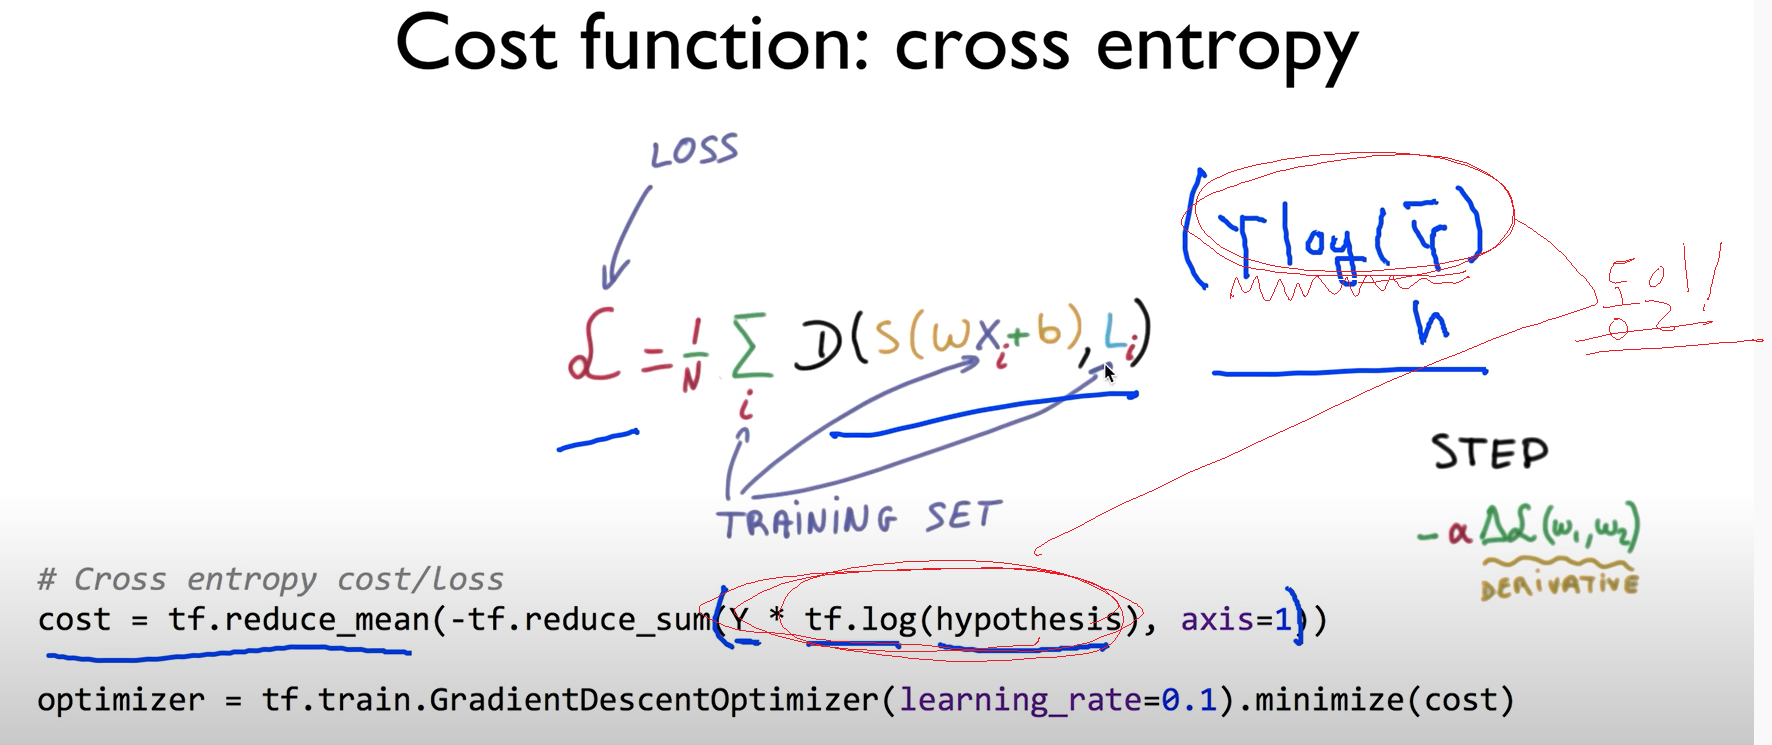

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x_data = [[1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5], [1,2,5,6], [1,6,6,6], [1,7,7,7]]
y_data = [[0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], [0,1,0], [1,0,0], [1,0,0]]

In [3]:
X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

In [4]:
W = tf.Variable(tf.random_normal([4, nb_classes]), name = 'weight')#이건 x_data 가 1*4행렬이니깐, 4*3 행렬을 곱해주면,1*3행렬이 나온다
b = tf.Variable(tf.random_normal([nb_classes]),name = 'bias')

In [5]:
hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)

In [6]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sess.run(optimizer, feed_dict = {X:x_data, Y:y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict = {X:x_data, Y:y_data}))
    print('--------------------')
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.arg_max(a, 1)))
    print('--------------------')
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.arg_max(b, 1)))
    print('--------------------')
    c = sess.run(hypothesis, feed_dict = {X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.arg_max(c,1)))
    print('--------------------')
    
    all = sess.run(hypothesis, feed_dict = {X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.arg_max(all, 1)))
    

0 2.0836792
200 0.6000775
400 0.49563158
600 0.4175033
800 0.3468746
1000 0.27536273
1200 0.2303835
1400 0.20940796
1600 0.19179025
1800 0.176795
2000 0.16388863
--------------------
[[1.3536033e-02 9.8645371e-01 1.0205939e-05]] [1]
--------------------
[[0.783354   0.1968012  0.01984481]] [0]
--------------------
[[2.0956254e-08 4.0302181e-04 9.9959701e-01]] [2]
--------------------
[[1.3536033e-02 9.8645371e-01 1.0205949e-05]
 [7.8335398e-01 1.9680120e-01 1.9844813e-02]
 [2.0956254e-08 4.0302161e-04 9.9959701e-01]] [1 0 2]


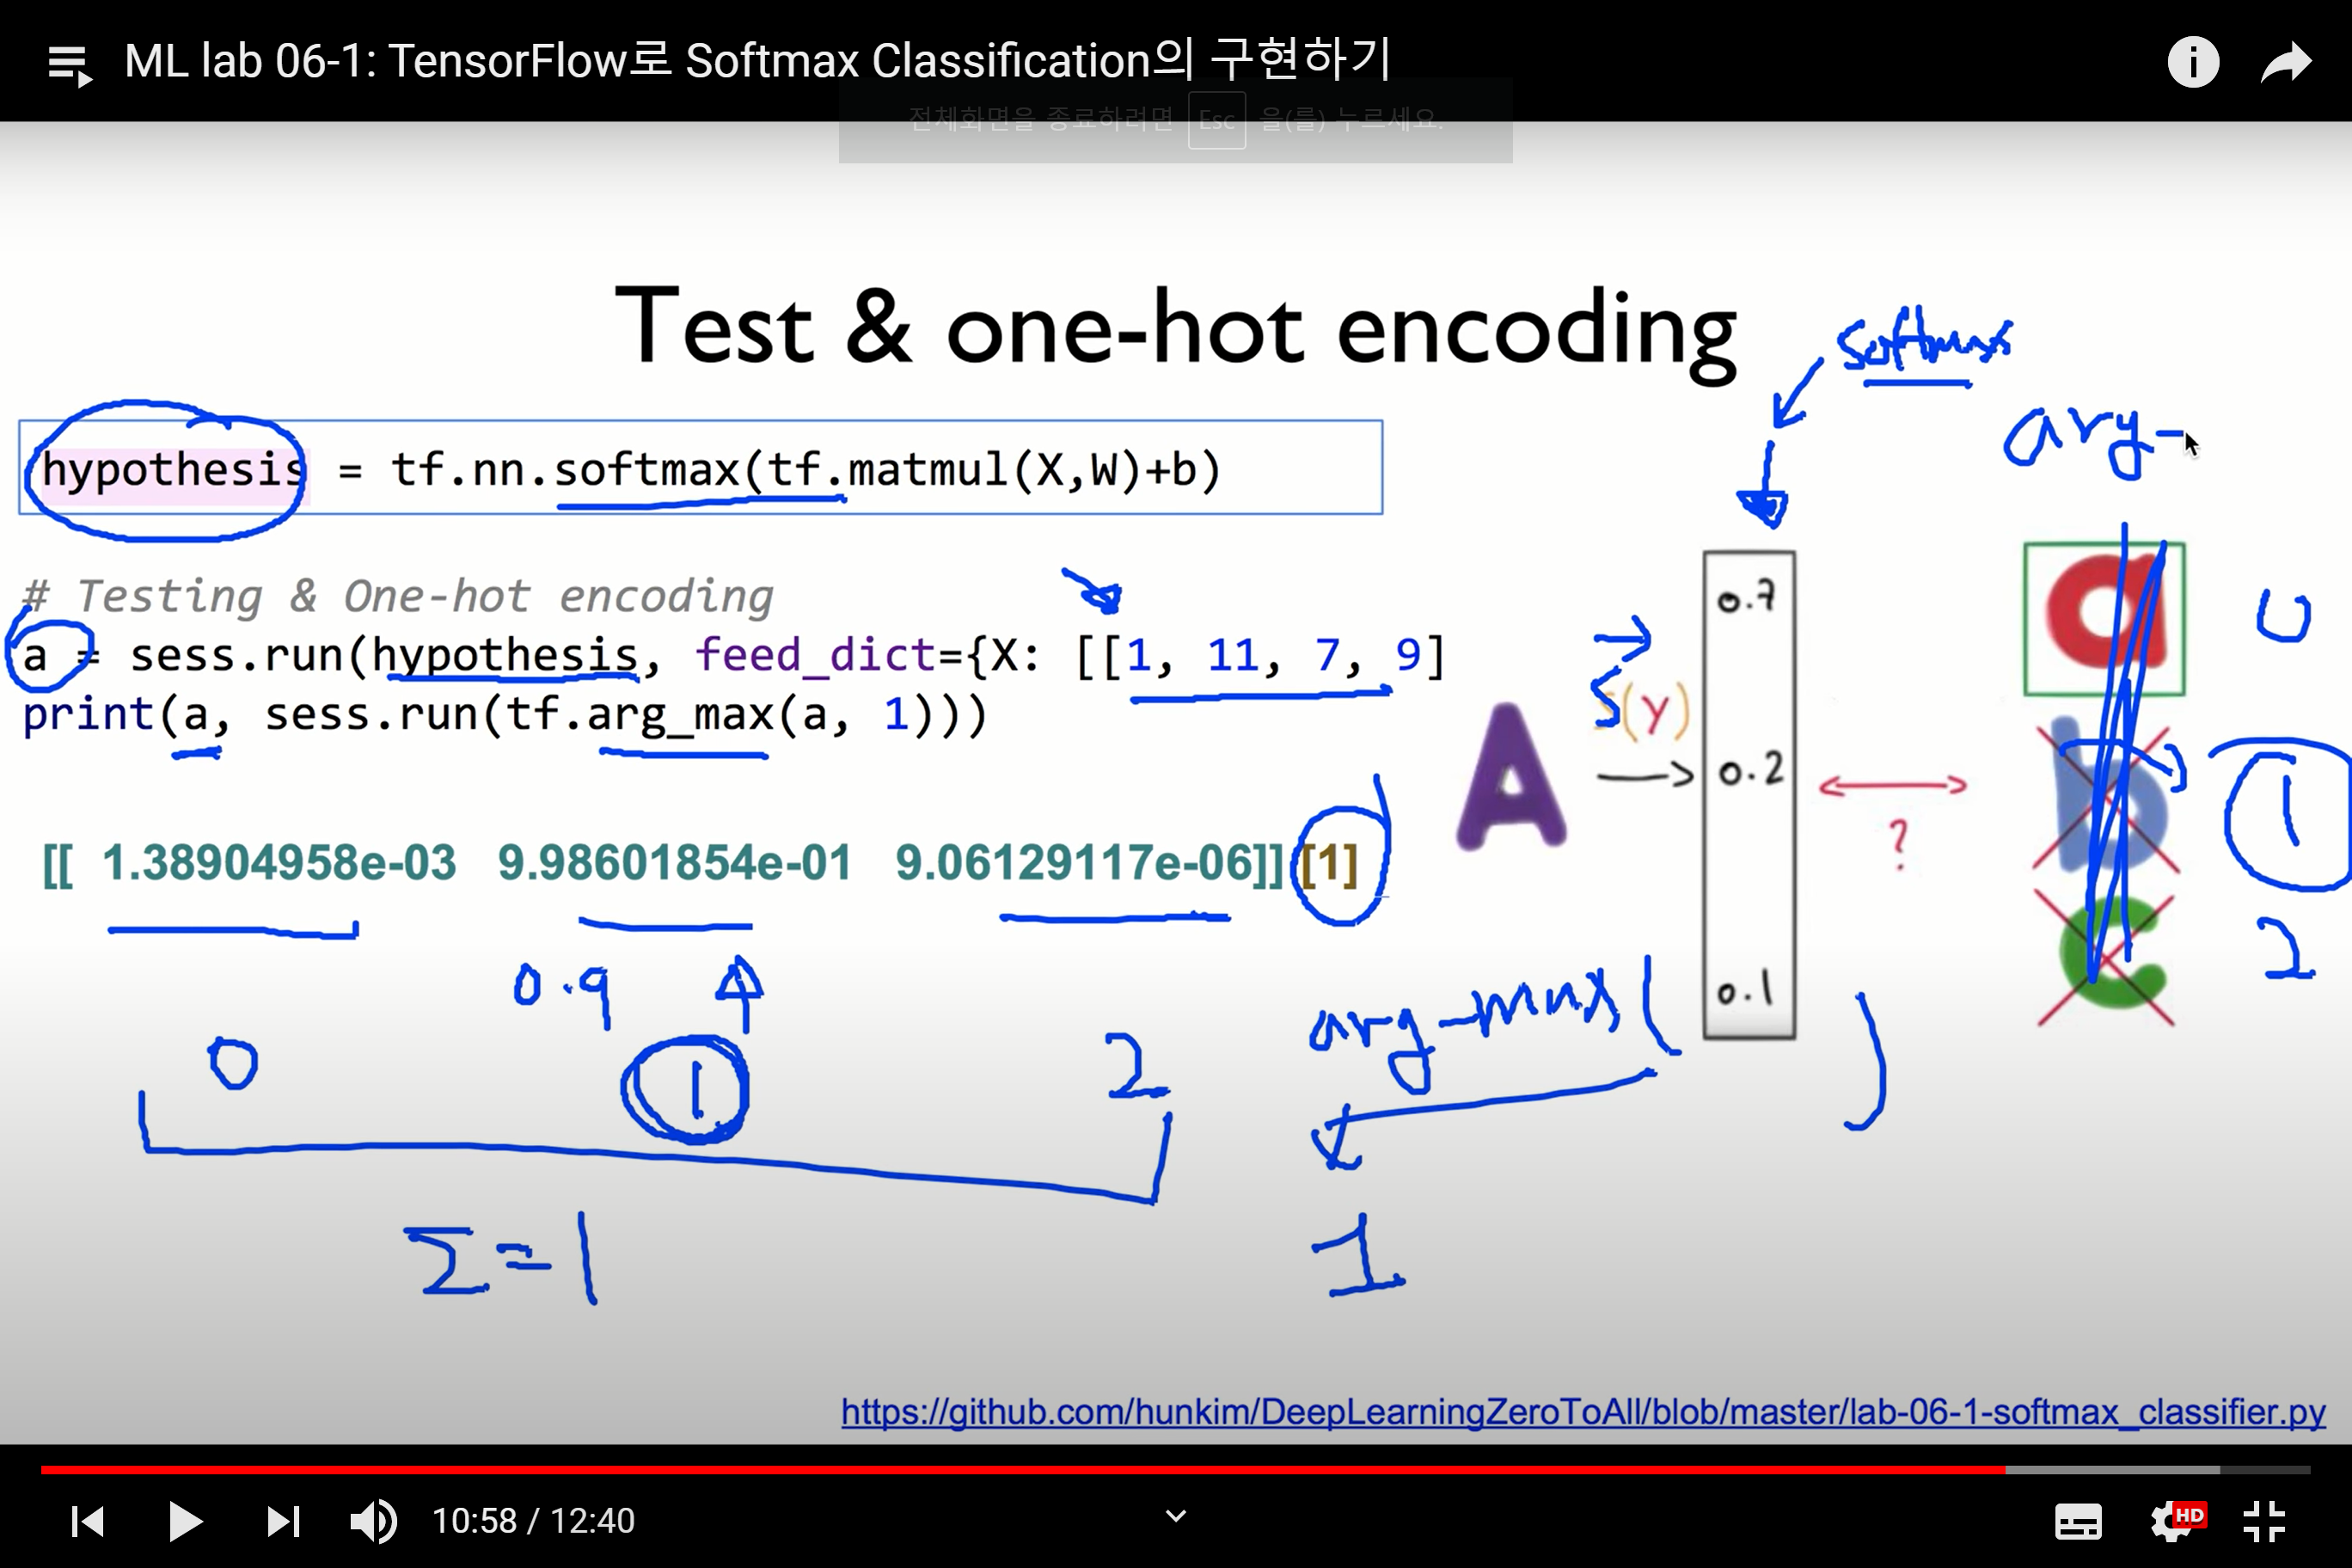